In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [28]:
from datasets import Dataset
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

## Loading Dataset

In [7]:
img_meta_train_df=pd.read_csv('/kaggle/input/amazon-ml-challenge-2024-ds/student_resource 3/dataset/train.csv')

In [12]:
img_meta_train_df.head()

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram


In [17]:
img_meta_train_df.isnull().sum()

image_link      0
group_id        0
entity_name     0
entity_value    0
dtype: int64

In [19]:
img_meta_train_df.describe()

,group_id
count,263859.000000
mean,545809.847525
std,249488.149296
min,101697.000000
25%,311997.000000
50%,524635.000000
75%,752266.000000
max,998545.000000


In [21]:
img_meta_train_df['entity_name'].value_counts()

entity_name
item_weight                      102786
depth                             45127
width                             44183
height                            43597
voltage                            9466
wattage                            7755
item_volume                        7682
maximum_weight_recommendation      3263
Name: count, dtype: int64

In [23]:
img_meta_train_df['entity_name'].unique()

array(['item_weight', 'item_volume', 'voltage', 'wattage',
       'maximum_weight_recommendation', 'height', 'depth', 'width'],
      dtype=object)

In [25]:
img_meta_train_df.groupby('entity_name')['entity_value'].describe()

,count,unique,top,freq
entity_name,,,,
depth,45127,3398,30.0 centimetre,686
height,43597,3619,10.0 centimetre,595
item_volume,7682,1117,200.0 millilitre,381
item_weight,102786,8435,100.0 gram,2397
maximum_weight_recommendation,3263,782,150 kilogram,116
voltage,9466,436,12.0 volt,1235
wattage,7755,562,60.0 watt,873
width,44183,3330,30.0 centimetre,620


In [8]:
img_meta_test_df=pd.read_csv('/kaggle/input/amazon-ml-challenge-2024-ds/student_resource 3/dataset/test.csv')

In [13]:
img_meta_test_df.head()

,index,image_link,group_id,entity_name
0,0,https://m.media-amazon.com/images/I/110EibNycl...,156839,height
1,1,https://m.media-amazon.com/images/I/11TU2clswz...,792578,width
2,2,https://m.media-amazon.com/images/I/11TU2clswz...,792578,height
3,3,https://m.media-amazon.com/images/I/11TU2clswz...,792578,depth
4,4,https://m.media-amazon.com/images/I/11gHj8dhhr...,792578,depth


In [18]:
img_meta_test_df.isnull().sum()

index          0
image_link     0
group_id       0
entity_name    0
dtype: int64

In [20]:
img_meta_test_df.describe()

,index,group_id
count,131187.000000,131187.000000
mean,65647.864049,570991.727138
std,37895.369530,263171.966064
min,0.000000,100951.000000
25%,32833.500000,347320.000000
50%,65652.000000,558832.000000
75%,98463.500000,810266.000000
max,131287.000000,999167.000000


In [22]:
img_meta_test_df['entity_name'].value_counts()

entity_name
height                           32282
depth                            28146
width                            26931
item_weight                      22032
maximum_weight_recommendation     7028
voltage                           5488
wattage                           5447
item_volume                       3833
Name: count, dtype: int64

In [24]:
img_meta_test_df['entity_name'].unique()

array(['height', 'width', 'depth', 'item_weight',
       'maximum_weight_recommendation', 'wattage', 'voltage',
       'item_volume'], dtype=object)

In [27]:
# img_meta_test_df.groupby('entity_name')['entity_value'].describe()

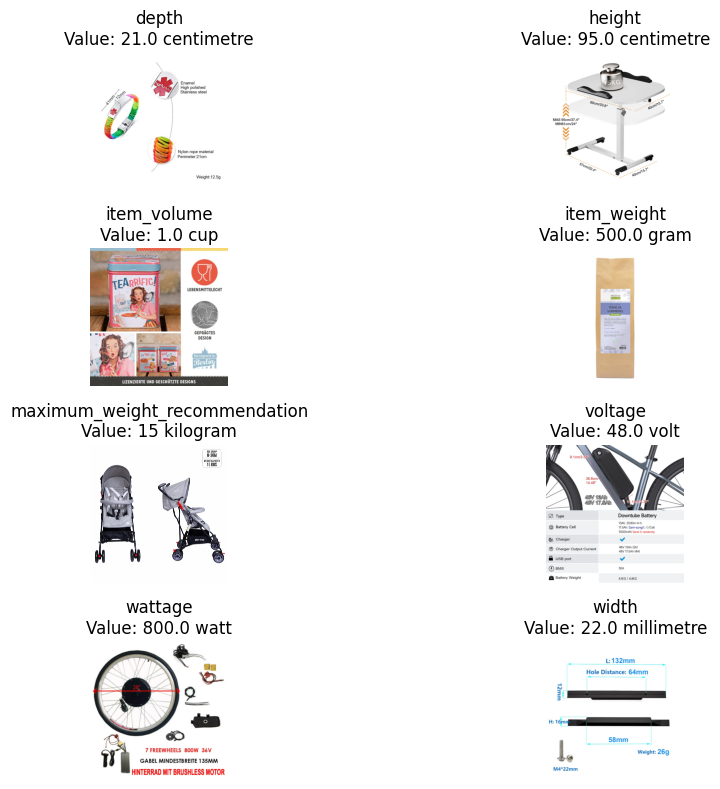

In [34]:
# Get one sample from each entity_name category
sampled_images = img_meta_train_df.groupby('entity_name').first().reset_index()

# Set number of rows and columns for the grid
num_cols = 2  # Number of columns in the grid
num_rows = (len(sampled_images) + num_cols - 1) // num_cols  # Calculate rows needed

# Adjust figure size (Increase figsize to increase the grid and image size)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))  # (width, height)

# Flatten the axes array for easier iteration if there are multiple rows/columns
axes = axes.flatten()

# Loop through each category and image
for i, row in sampled_images.iterrows():
    # Get image URL
    img_url = row['image_link']
    
    # Download and open the image
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    
    # Plot the image in the subplot
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide the axes
    
    # Set the title as the entity_name and entity_value
    axes[i].set_title(f"{row['entity_name']}\nValue: {row['entity_value']}", fontsize=12)

# Remove empty subplots (if any) in case the grid has more cells than images
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
img_meta_train_ds=Dataset.from_pandas(img_meta_train_df)

In [10]:
img_meta_test_ds=Dataset.from_pandas(img_meta_test_df)

In [11]:
img_meta_train_ds

Dataset({
    features: ['image_link', 'group_id', 'entity_name', 'entity_value'],
    num_rows: 263859
})

In [15]:
img_meta_train_ds[0]

{'image_link': 'https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg',
 'group_id': 748919,
 'entity_name': 'item_weight',
 'entity_value': '500.0 gram'}

In [14]:
img_meta_test_ds

Dataset({
    features: ['index', 'image_link', 'group_id', 'entity_name'],
    num_rows: 131187
})

In [16]:
img_meta_test_ds[0]

{'index': 0,
 'image_link': 'https://m.media-amazon.com/images/I/110EibNyclL.jpg',
 'group_id': 156839,
 'entity_name': 'height'}